In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import joblib

RANDOM_SEED = 42

In [164]:
df = pd.read_csv('spambase_data.csv', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [165]:
# rough work

df.columns[:-1]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56],
           dtype='int64')

In [166]:
# handonw with commands

X = df[df.columns[:-1]]

Y = df[len(df.columns) - 1]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.30 , random_state = 30)

Dtree = DecisionTreeClassifier(random_state = 30) 
Dtree.fit(X_train, Y_train)

predictions = Dtree.predict(X_test)


print(classification_report(Y_test, predictions))

print("Confusion Matrix")
print(confusion_matrix(Y_test, predictions))

print("\n Accuracy")
print(accuracy_score(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.90      0.87      0.89       518

    accuracy                           0.92      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.91      0.92      0.91      1381

Confusion Matrix
[[813  50]
 [ 67 451]]

 Accuracy
0.9152787834902245


In [1]:
#saving scikit model
joblib.dump(Dtree, "Dtree.pkl")

NameError: name 'joblib' is not defined

Majiority class for root node is 0
Majiority class for left node is 0
Majiority class for right node is 1


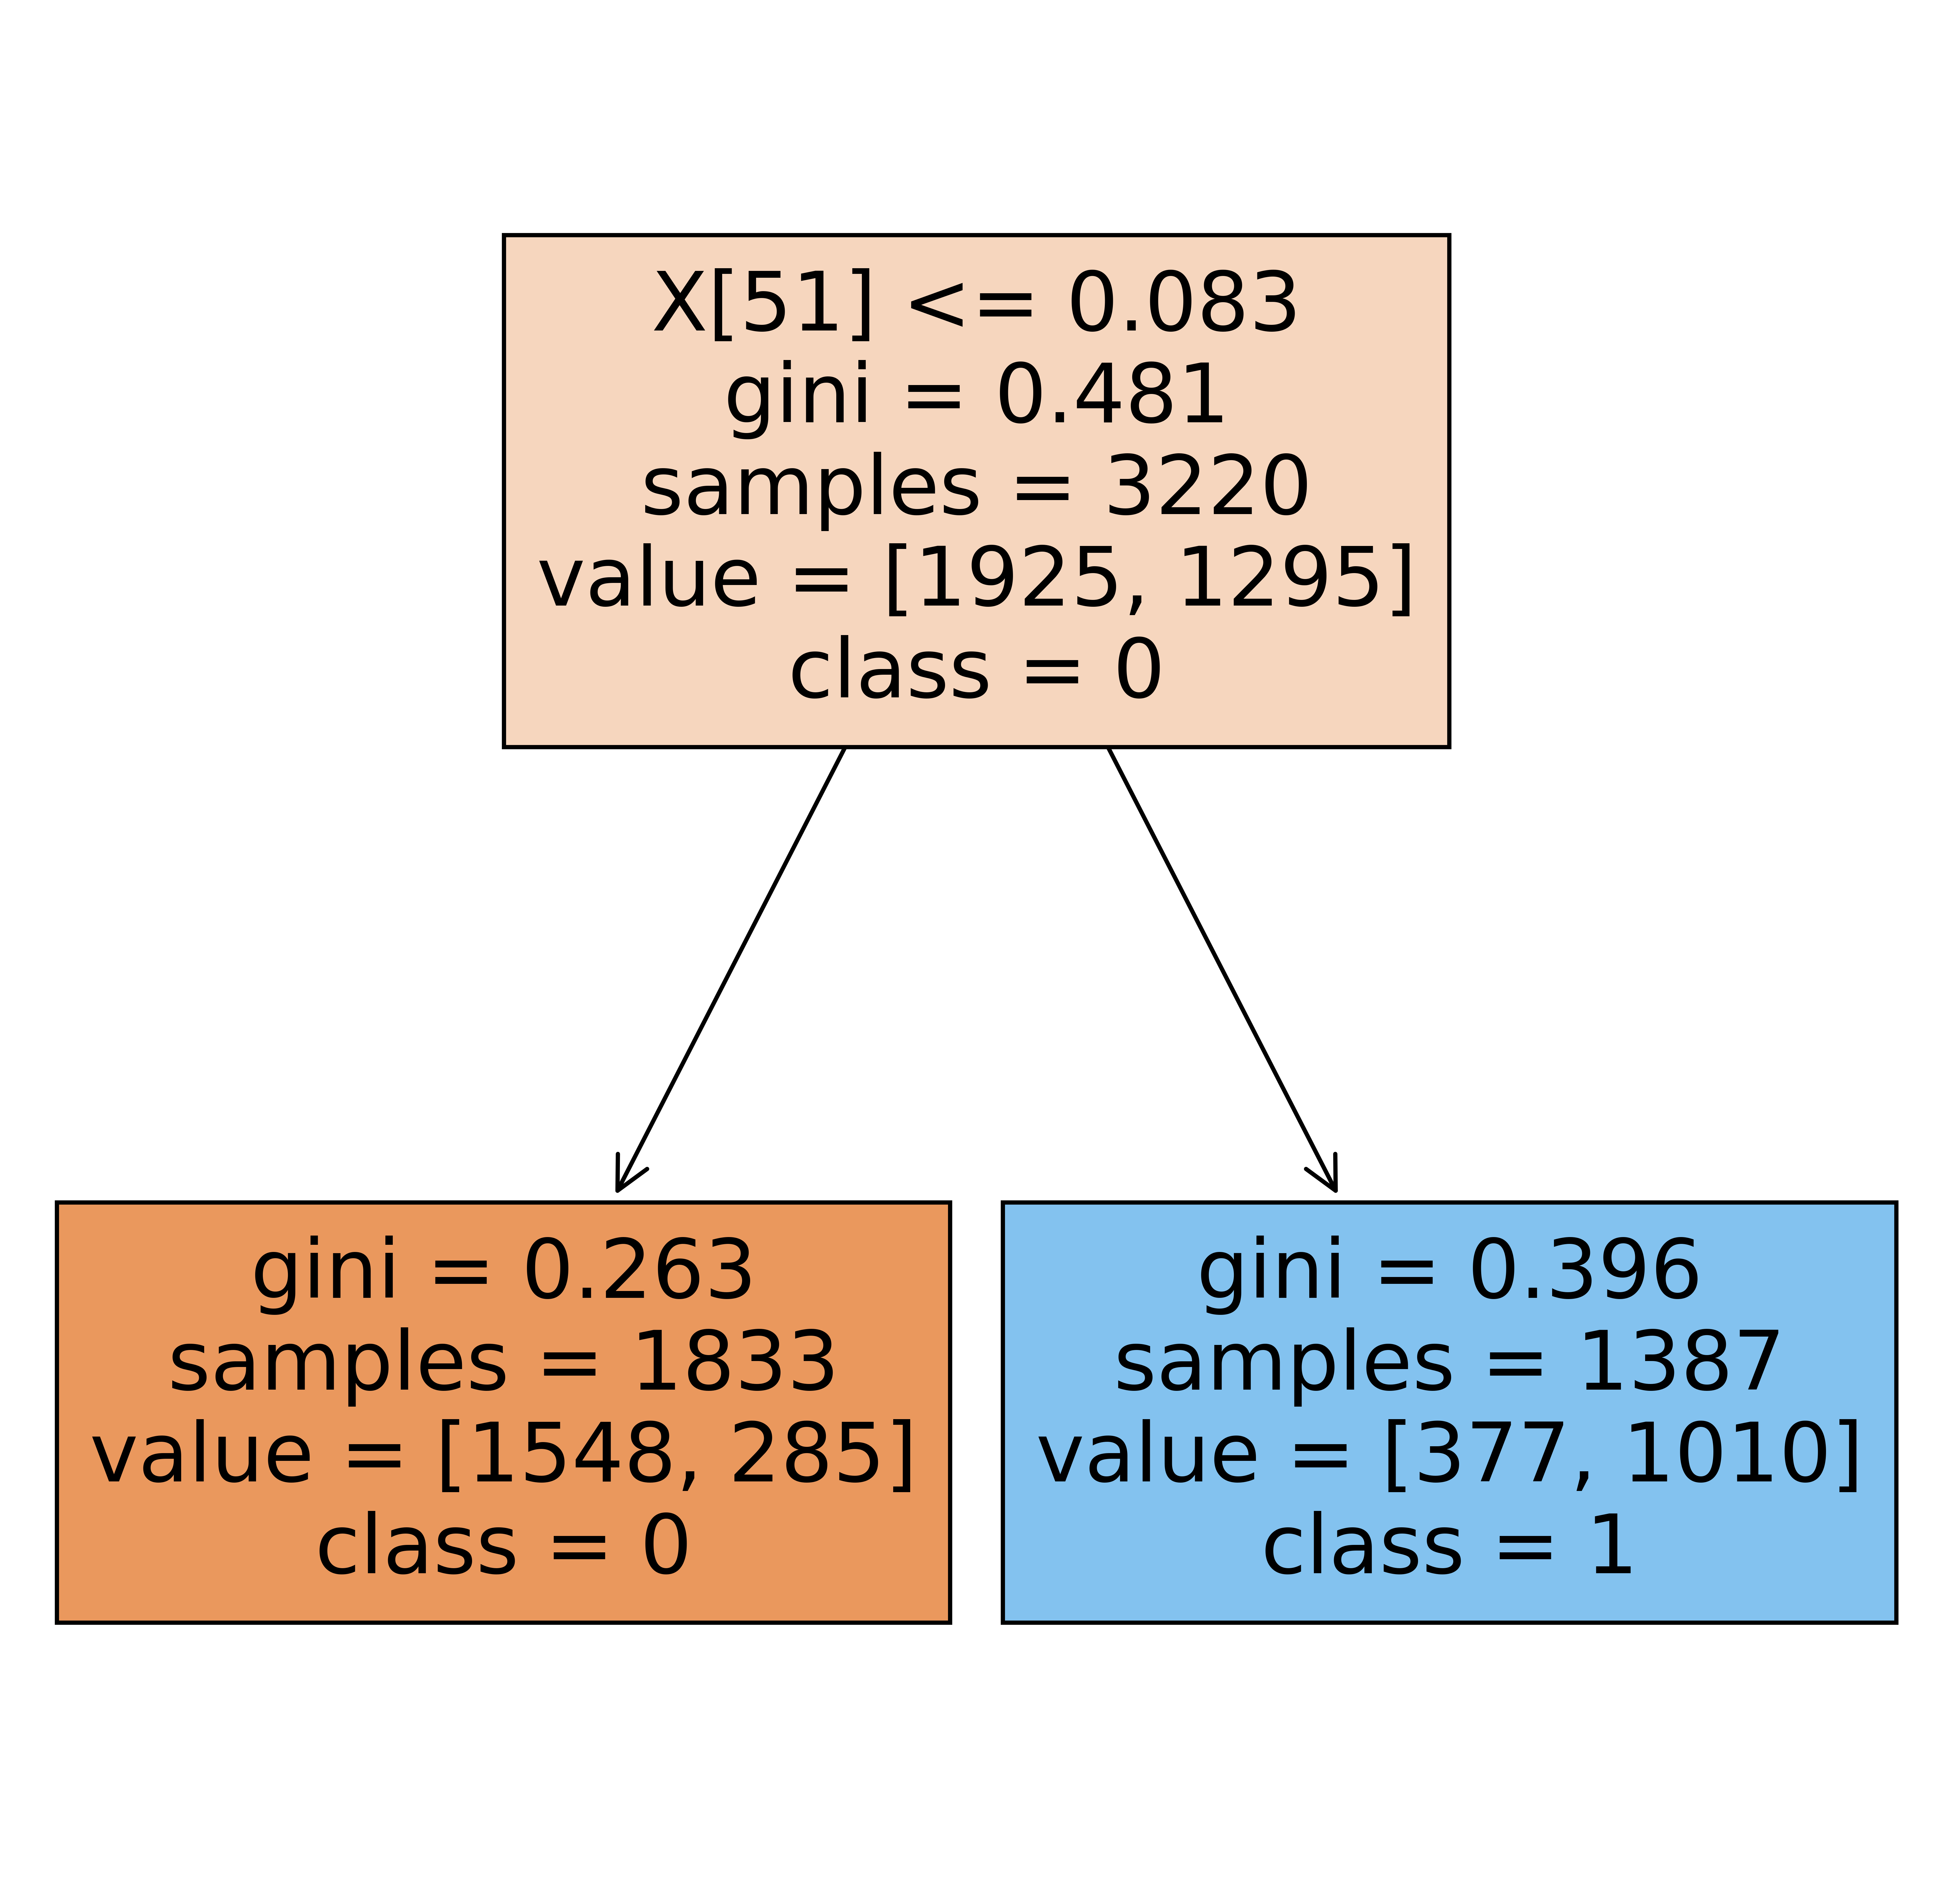

In [167]:
# Question 1

# Decision Tree Classifier using gini index
Dtree = DecisionTreeClassifier(random_state = 30, max_depth = 1) 
Dtree.fit(X_train, Y_train)

predictions = Dtree.predict(X_test)


fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8), dpi = 1024)
tree.plot_tree(Dtree, class_names=["0","1"],filled=True)

print("Majiority class for root node is 0")
print("Majiority class for left node is 0")
print("Majiority class for right node is 1")

# Majiority class is mentioned in visualisation of tree below:

In [168]:
# Question 2

# Decision tree Classifier using entropy
Dtree_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
Dtree_entropy.fit(X_train, Y_train)
predictionsen = Dtree_entropy.predict(X_test)

In [169]:
# Question 3

Dtree = DecisionTreeClassifier(random_state = 30) 
Dtree.fit(X_train, Y_train)
predictions = Dtree.predict(X_test)
print("Accuracy using gini index =" , accuracy_score(Y_test, predictions))
print("Accuracy using entropy =" , accuracy_score(Y_test, predictionsen), "\n")


print("classification report using gini index:" )
print(classification_report(Y_test, predictions), "\n")
print("confusion matrix report using gini index:")
print(confusion_matrix(Y_test, predictions), "\n")


print("classification report using entropy:")
print(classification_report(Y_test, predictionsen), "\n")
print("confusion matrix report using entropy:")
print(confusion_matrix(Y_test, predictionsen), "\n")


print("Decision Tree Classifier is giving better accuracy for gini index than and entropy, but with a very small margin.")

Accuracy using gini index = 0.9152787834902245
Accuracy using entropy = 0.9102099927588704 

classification report using gini index:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.90      0.87      0.89       518

    accuracy                           0.92      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.91      0.92      0.91      1381
 

confusion matrix report using gini index:
[[813  50]
 [ 67 451]] 

classification report using entropy:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.90      0.86      0.88       518

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381
 

confusion matrix report using entropy:
[[814  49]
 [ 75 443]] 

Decision Tree Classifier is giving better

In [170]:
# Question 4


for i in range(3, 26):
    
    Dtree_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 30, max_depth = i)
    Dtree_entropy.fit(X_train, Y_train)
    predictionsen = Dtree_entropy.predict(X_test)
    print("Accuracy for height " , Dtree_entropy.get_depth()  , " = " , accuracy_score(Y_test, predictionsen))
    
print("Accuracy is maximum for height 18")

Accuracy for height  3  =  0.8761766835626358
Accuracy for height  4  =  0.8921071687183201
Accuracy for height  5  =  0.9000724112961622
Accuracy for height  6  =  0.9036929761042722
Accuracy for height  7  =  0.9080376538740044
Accuracy for height  8  =  0.9138305575669804
Accuracy for height  9  =  0.9058653149891384
Accuracy for height  10  =  0.9073135409123824
Accuracy for height  11  =  0.9102099927588704
Accuracy for height  12  =  0.9094858797972484
Accuracy for height  13  =  0.9123823316437364
Accuracy for height  14  =  0.9094858797972484
Accuracy for height  15  =  0.9145546705286025
Accuracy for height  16  =  0.9116582186821144
Accuracy for height  17  =  0.9131064446053584
Accuracy for height  18  =  0.9152787834902245
Accuracy for height  19  =  0.9094858797972484
Accuracy for height  20  =  0.9102099927588704
Accuracy for height  20  =  0.9102099927588704
Accuracy for height  20  =  0.9102099927588704
Accuracy for height  20  =  0.9102099927588704
Accuracy for height 

In [171]:
# Question 5

import heapq

feature_imp = Dtree_entropy.feature_importances_

# array to store best 10 features
max_imp_feature = np.array([])

for i in range(0,  10):
    max_imp_attr = -1
            
    max_imp_attr = feature_imp.argmax(axis=0)

    max_imp_feature = np.append(max_imp_feature,max_imp_attr)
    feature_imp[max_imp_attr] = -1

X_topten_train = X_train.loc[:,max_imp_feature]
X_topten_test = X_test.loc[:,max_imp_feature]

Dtree_entropy.fit(X_topten_train, Y_train)
predictionsen_topten = Dtree_entropy.predict(X_topten_test)

print("Accuracy using all features =" , accuracy_score(Y_test, predictionsen), "\n")

print("Accuracy using top ten features =" , accuracy_score(Y_test, predictionsen_topten), "\n")

print("Information loss = " , accuracy_score(Y_test, predictionsen) - accuracy_score(Y_test, predictionsen_topten))


Accuracy using all features = 0.9102099927588704 

Accuracy using top ten features = 0.9080376538740044 

Information loss =  0.0021723388848660097
